<font size="6"> <div class="alert alert-block alert-info"> Chess Playing Agent </div> </font>
  
  <font size="4"> **João Oliveira | jbboa@iscte-iul.pt** </font>
  

   In this notebook we will go over:
   
   * Preparation of required data to feed the agent.
   * Executing the "main.py" script to observe the results of the game.

#### Prepare required data to feed the agent (moves and openings) | **Using .csv files**

In [ ]:
import pandas as pd

# Read each CSV file into a separate DataFrame
df_gameinfo = pd.read_csv("Carlsen_game_info.csv") # This file contains general information about the game, each row is a game
df_ecocodes = pd.read_csv("eco_codes.csv") # This file contains all openings frorm the the Encyclopaedia of Chess Openings (ECO)
df_moves = pd.read_csv("Carlsen_moves.csv") # This file contains all the moves played in a game, each move is a row

FileNotFoundError: [Errno 2] No such file or directory: 'Carlsen_moves.csv'

#### Openings / df_ecocodes

In [51]:
df_ecocodes.drop(columns=['eco_type', 'eco_group'], inplace=True)
df_ecocodes

,eco,eco_name,eco_example
0,A00,Uncommon Opening,"1 g4, a3, h3, etc."
1,A01,Nimzovich-Larsen Attack,1 b3
2,A02,Bird's Opening,1 f4
3,A03,Bird's Opening,1 f4 d5
4,A04,Reti Opening,1 Nf3
...,...,...,...
495,E95,"King's Indian, Orthodox, 7...Nbd7, 8.Re1",1 d4 Nf6 2 c4 g6 3 Nc3 Bg7 4 e4 d6 5 Nf3 O-O 6...
496,E96,"King's Indian, Orthodox, 7...Nbd7, Main line",1 d4 Nf6 2 c4 g6 3 Nc3 Bg7 4 e4 d6 5 Nf3 O-O 6...
497,E97,King's Indian,1 d4 Nf6 2 c4 g6 3 Nc3 Bg7 4 e4 d6 5 Nf3 O-O 6...
498,E98,"King's Indian, Orthodox, Taimanov, 9.Ne1",1 d4 Nf6 2 c4 g6 3 Nc3 Bg7 4 e4 d6 5 Nf3 O-O 6...


#### Magnus Carlsen moves in games where he won with white or black pieces within specific events

In [5]:
##### Moves DataFrame #####

# Select only the specified columns
columns_to_keep = ['game_id', 'move_sequence'] # List of columns to keep
df_moves = df_moves.loc[:, columns_to_keep]

##### Games DataFrame #####

# Select only the specified columns
columns_to_keep = ['game_id', 'white', 'winner', 'event', 'eco'] # List of columns to keep
df_gameinfo = df_gameinfo.loc[:, columns_to_keep]

# Convert columns
df_gameinfo['white'] = df_gameinfo['white'].apply(lambda x: 1 if x == 'Carlsen,M' or x == 'Carlsen,Magnus'else 0)
df_gameinfo['result'] = df_gameinfo['winner'].apply(lambda x: 1 if x == 'Carlsen,M' or x == 'Carlsen,Magnus'else (2 if x == 'draw' else 0))

# Select only the games which Magnus won
df_gameinfo = df_gameinfo[df_gameinfo['result'] == 1] # Select the games which Magnus won
#df_gameinfo = df_gameinfo[df_gameinfo['result'] != 0] # Select the games which Magnus won or drew

# List of specific values to keep within the 'event' column
specific_events = ['84th Tata Steel Masters', '83rd Tata Steel Masters', '82nd Tata Steel GpA', '81st Tata Steel GpA', '80th Tata Steel GpA', '80th Tata Steel GpA TB', '79th Tata Steel GpA', '78th Tata Steel GpA', '77th Tata Steel GpA', '75th Tata Steel GpA', '74th Tata Steel GMA', '73rd Tata Steel GMA', # Wijk aan Zee/Tata Steel Masters
   '44th Olympiad 2022', '42nd Olympiad 2016', '41st Olympiad Open 2014', '39th Olympiad Men', '38th Olympiad', '37th Olympiad', '36th Olympiad', 'Event3', # Olympiads
   'FIDE World Cup 2021', 'World Blitz 2021', 'World Rapid 2021', 'World Rapid 2019', 'World Blitz 2019', 'World Blitz TB 2019', 'World Rapid 2018', 'World Blitz 2018', 'FIDE World Cup 2017', 'World Blitz 2017', 'World Rapid 2017', 'World Blitz 2016', 'World Rapid 2016', 'World Rapid 2015', 'World Blitz 2015', 'FIDE World Rapid 2014', 'FIDE World Blitz 2014', 'FIDE Candidates', 'World Blitz Final', 'VI World Blitz' 'World Rapid Final', 'VI World Blitz', 'World Cup', 'World Blitz',  # FIDE World championships
   '7th Sinquefield Cup 2019', '7th Sinquefield Cup TB', '6th Sinquefield Cup 2018', '5th Sinquefield Cup 2017', '3rd Sinquefield Cup 2015', '2nd Sinquefield Cup 2014', 'Sinquefield Cup 2013'] # Sinquefield cup
df_gameinfo = df_gameinfo[df_gameinfo['event'].isin(specific_events)]
df_gameinfo.drop(columns=['winner', 'event'], inplace=True)
df_gameinfo.reset_index(drop=True, inplace=True)
df_gameinfo = pd.merge(df_gameinfo, df_moves, on='game_id', how='left')

# Find the longest move sequence per game_id, since the merge created multiple rows per game_id

# Ensure move_sequence is treated as a string and measure its length
df_gameinfo['sequence_length'] = df_gameinfo['move_sequence'].str.len()

# Keep only the rows where the move_sequence length is the longest per game_id
df_gameinfo = df_gameinfo.loc[df_gameinfo.groupby('game_id')['sequence_length'].idxmax()]
df_gameinfo.drop(columns=['sequence_length'], inplace=True)
df_gameinfo.reset_index(drop=True, inplace=True)

# Filter df_gameinfo for white and black players
df_whitegames = df_gameinfo[df_gameinfo['white'] == 1].reset_index(drop=True)
df_whitegames.drop(columns=['game_id', 'white', 'result'], inplace=True)
df_blackgames = df_gameinfo[df_gameinfo['white'] == 0].reset_index(drop=True)
df_blackgames.drop(columns=['game_id', 'white', 'result'], inplace=True)

In [47]:
# Save the DataFrames to a CSV files
df_blackgames.to_csv('black.csv.gz', index=False, compression='gzip')
df_whitegames.to_csv('white.csv.gz', index=False, compression='gzip')
df_ecocodes.to_csv('openings.csv.gz', index=False, compression='gzip')

#### Prepare required data to feed the agent (moves and openings) | **Using .pgn files**

In [ ]:
import pandas as pd
import chess.pgn

def parse_pgn_file(pgn_file_path):
    """
    Parse a PGN file and extract game information and moves.
    Returns two dataframes: game_info and moves.
    """
    # Lists to store game information and moves
    games_data = []
    moves_data = []
    
    # Open the PGN file
    with open(pgn_file_path, encoding='utf-8') as pgn_file:
        while True:
            # Read each game from the PGN file
            game = chess.pgn.read_game(pgn_file)
            if game is None:  # End of file
                break
            
            # Extract game information
            headers = game.headers
            game_id = len(games_data) + 1  # Generate a unique game ID
            event = headers.get('Event', '')
            white = headers.get('White', '')
            black = headers.get('Black', '')
            result = headers.get('Result', '')
            eco = headers.get('ECO', '')
            
            # Determine winner
            if result == '1-0':
                winner = white
            elif result == '0-1':
                winner = black
            else:  # Draw or other results
                winner = 'draw'
            
            # Get moves as a string
            move_sequence = ' '.join(str(move) for move in game.mainline_moves())
            
            # Add game info to the list
            games_data.append({
                'game_id': game_id,
                'event': event,
                'white': white,
                'black': black,
                'result': result,
                'eco': eco,
                'winner': winner
            })
            
            # Add moves to the list
            moves_data.append({
                'game_id': game_id,
                'move_sequence': move_sequence
            })
    
    # Create DataFrames
    df_gameinfo = pd.DataFrame(games_data)
    df_moves = pd.DataFrame(moves_data)
    
    return df_gameinfo, df_moves

# Main execution
def main(pgn_file_path, eco_codes_path):
    # Parse the PGN file
    df_gameinfo, df_moves = parse_pgn_file(pgn_file_path)
    
    # Load ECO codes from your existing file
    df_ecocodes = pd.read_csv(eco_codes_path)
    
    ##### Moves DataFrame #####
    # Select only the specified columns
    columns_to_keep = ['game_id', 'move_sequence']
    df_moves = df_moves.loc[:, columns_to_keep]
    
    ##### Games DataFrame #####
    # Select only the specified columns
    columns_to_keep = ['game_id', 'white', 'winner', 'event', 'eco']
    df_gameinfo = df_gameinfo.loc[:, columns_to_keep]
    
    # Convert columns - check if the player is Carlsen
    df_gameinfo['white'] = df_gameinfo['white'].apply(
        lambda x: 1 if 'Carlsen' in x else 0
    )
    df_gameinfo['result'] = df_gameinfo['winner'].apply(
        lambda x: 1 if 'Carlsen' in x else (2 if x == 'draw' else 0)
    )
    
    # Select only the games which Magnus won
    df_gameinfo = df_gameinfo[df_gameinfo['result'] == 1]
    
    # List of specific events to keep
    specific_events = [
        '84th Tata Steel Masters', '83rd Tata Steel Masters', '82nd Tata Steel GpA', 
        '81st Tata Steel GpA', '80th Tata Steel GpA', '80th Tata Steel GpA TB', 
        '79th Tata Steel GpA', '78th Tata Steel GpA', '77th Tata Steel GpA', 
        '75th Tata Steel GpA', '74th Tata Steel GMA', '73rd Tata Steel GMA',
        '44th Olympiad 2022', '42nd Olympiad 2016', '41st Olympiad Open 2014', 
        '39th Olympiad Men', '38th Olympiad', '37th Olympiad', '36th Olympiad',
        'FIDE World Cup 2021', 'World Blitz 2021', 'World Rapid 2021', 
        'World Rapid 2019', 'World Blitz 2019', 'World Blitz TB 2019',
        'World Rapid 2018', 'World Blitz 2018', 'FIDE World Cup 2017',
        'World Blitz 2017', 'World Rapid 2017', 'World Blitz 2016',
        'World Rapid 2016', 'World Rapid 2015', 'World Blitz 2015',
        'FIDE World Rapid 2014', 'FIDE World Blitz 2014', 'FIDE Candidates',
        'World Blitz Final', 'VI World Blitz', 'World Rapid Final',
        'VI World Blitz', 'World Cup', 'World Blitz',
        '7th Sinquefield Cup 2019', '7th Sinquefield Cup TB',
        '6th Sinquefield Cup 2018', '5th Sinquefield Cup 2017',
        '3rd Sinquefield Cup 2015', '2nd Sinquefield Cup 2014',
        'Sinquefield Cup 2013', 'Troll Masters'  # Added Troll Masters to match your sample data
    ]
    
    # Filter for specific events
    df_gameinfo = df_gameinfo[df_gameinfo['event'].isin(specific_events)]
    df_gameinfo.drop(columns=['winner', 'event'], inplace=True)
    df_gameinfo.reset_index(drop=True, inplace=True)
    
    # Merge game info with moves
    df_gameinfo = pd.merge(df_gameinfo, df_moves, on='game_id', how='left')
    
    # Find the longest move sequence per game_id
    df_gameinfo['sequence_length'] = df_gameinfo['move_sequence'].str.len()
    df_gameinfo = df_gameinfo.loc[df_gameinfo.groupby('game_id')['sequence_length'].idxmax()]
    df_gameinfo.drop(columns=['sequence_length'], inplace=True)
    df_gameinfo.reset_index(drop=True, inplace=True)
    
    # Filter df_gameinfo for white and black players
    df_whitegames = df_gameinfo[df_gameinfo['white'] == 1].reset_index(drop=True)
    df_whitegames.drop(columns=['game_id', 'white', 'result'], inplace=True)
    df_blackgames = df_gameinfo[df_gameinfo['white'] == 0].reset_index(drop=True)
    df_blackgames.drop(columns=['game_id', 'white', 'result'], inplace=True)
    
    # Save the DataFrames to CSV files
    df_blackgames.to_csv('black.csv.gz', index=False, compression='gzip')
    df_whitegames.to_csv('white.csv.gz', index=False, compression='gzip')
    
    return df_blackgames, df_whitegames

# Usage example:
# df_black, df_white = main("your_pgn_file.pgn", "eco_codes.csv")

#### Run the match executable | match.py

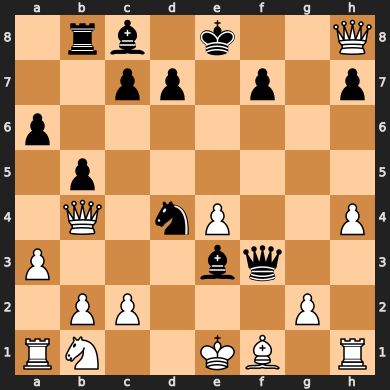

White clock: 0.10s, Black clock: 0.10s
Game Over: 1-0


In [4]:
%run match.py

#### Run unittests | --test

In [ ]:
%run match.py --test

E..

..E
ERROR: test_render (tests.TestMatch)
Test render function (mocked)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Desktop\github\chessbot\tests.py", line 188, in test_render
    self.match.render()
  File "C:\Desktop\github\chessbot\main.py", line 549, in render
    display(SVG(chess.svg.board(board=self.board)))
  File "c:\Users\joaob\anaconda3\envs\fraud\lib\site-packages\IPython\core\display.py", line 320, in __init__
    self.data = data
  File "c:\Users\joaob\anaconda3\envs\fraud\lib\site-packages\IPython\core\display.py", line 491, in data
    x = minidom.parseString(svg)
  File "c:\Users\joaob\anaconda3\envs\fraud\lib\xml\dom\minidom.py", line 2000, in parseString
    return expatbuilder.parseString(string)
  File "c:\Users\joaob\anaconda3\envs\fraud\lib\xml\dom\expatbuilder.py", line 925, in parseString
    return builder.parseString(string)
  File "c:\Users\joaob\anaconda3\envs\fraud\lib\xml\dom\expatbui